<a href="https://colab.research.google.com/github/brianferrell787/Hyperparameter-tuning-deep-learning-text-classification-model-using-Talos/blob/master/TalosModelHyperparametertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model building and hyperparameter tuning with Talos**

**Import and install** 

In [ ]:
# Keras
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GRU
from keras.layers.embeddings import Embedding

## Plot

import matplotlib as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

Using TensorFlow backend.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install tensorflow==1.15

In [ ]:
!pip install talos

     |████████████████████████████████| 26.6MB 1.4MB/s 
     |████████████████████████████████| 839kB 29.8MB/s 
  Created wheel for talos: filename=talos-0.6.3-cp36-none-any.whl size=49626 sha256=a4cdbac1782f4bc5b65d18ecec3451c98711333b1e538f065f1b0fd6e0a3f2a1
  Stored in directory: /root/.cache/pip/wheels/bb/d7/6b/86fd8b1fc7cfbd2c54796412f86efb5fb6a3a5c734014f6a66
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=e63787cc7a126a2d40a98b23e458486ffb449e8fdef6c1047f7aabd3d5973525
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for astetik: filename=astetik-1.9.9-cp36-none-any.whl size=56960 sha256=28e0e7457012e2401306173759245ef6bf99294aa479af62a67db5841218f6b0
  Stored in directory: /root/.cache/pip/wheels/ae/70/21/c475cd079ec401dd6e1b9b1d42b4c38554ce12679bfb214aad
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=e12bd953203930f1b30a36ea

**Upload and preprocess data(clean, tokenize, Glove embeddings, etc)**

In [ ]:
import pandas as pd
from google.colab import files
uploaded3 = files.upload()
for fn in uploaded3.keys():
  print('User uploaded3 file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded3[fn])))

Saving training_df7k.json to training_df7k.json
User uploaded3 file "training_df7k.json" with length 110149962 bytes


In [ ]:
train_df = pd.read_json('training_df26k.json')

from sklearn.utils import shuffle
train_df = shuffle(train_df)
train_df

,Text,Class
3788,newly born infants are at increased risk for l...,0
24928,the crater health district which encompasses n...,5
20736,the national assessment of educational progres...,3
5631,"art of nursing is a collaborative , action res...",0
22324,this goal is to evaluate the effectiveness of ...,4
...,...,...
5387,study overviewa randomized controlled trials w...,0
1182,speaking the same language before starting the...,0
5567,undergraduate students will be recruited from ...,0
23258,engaging richmond will partner with the city o...,4


In [ ]:
#Get rid of NULLS
train_df=train_df.fillna("")


In [ ]:
train_df.isnull().any()

Text     False
Class    False
dtype: bool

In [ ]:
train_df.isnull().sum()

Text     0
Class    0
dtype: int64

In [ ]:
#I do this because my columns are seperated. No needed though
train_df['New'] = train_df['AimsGoal'] + train_df['Hypothesis'] + train_df['Background'] + train_df['Study Design']

In [ ]:
import nltk
import re  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    nltk.download('stopwords')
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", "  ", text)
    text = re.sub(r"=", "  ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", "  ", text)
    text = re.sub(r";", "  ", text)
    text = re.sub(r"http", "  ", text)
    text = re.sub(r"www", "  ", text)
    text = re.sub(r"-", "  ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"\d+", " ", text)

    ## Lemmatize
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemma_words)

    return text


In [ ]:
#This code my not be needed for you 
train_df['New'] =train_df['New'].astype(str)

In [ ]:
# apply the above function to df['text']
traintext = train_df['Text'].map(lambda x: clean_text(x))

In [ ]:
#Cleaned up text data 
traintext

3788     newly born infant increased risk learning disa...
24928    crater health district encompasses nashville s...
20736    national assessment educational progress naep ...
5631     art nursing collaborative action research proj...
22324    goal evaluate effectiveness gardening workshop...
                               ...                        
5387     study overviewa randomized controlled trial co...
1182     speaking language starting conversation unders...
5567     undergraduate student recruited virginia commo...
23258    engaging richmond partner city richmond office...
9756     debate utility resilience research concept sum...
Name: Text, Length: 26894, dtype: object

In [ ]:
print(max(traintext))
#max(text, key=len)

youth voluntary study participant assisting research attended passed citi communication exam trained team member practical instruction data analysis analysis procedure team gather weekly review research plan maintain regular communication teleconference meeting email primary method communication time formal meeting information learn participant study help participant design better program youth family school ray glenwood njo burlington somerset township postal mail person communication three public school system franklin elementary school franklin high school burlington high school mail post formed information letter parent guardian permission research child arrive student email address information letter parent guardian permission research child research team meet student th grade english class time research team explain voluntary interview obtain assent consent mama institute art new york vitro electronic communication mama foundation participant mail pre formed information letter pa

In [ ]:
max = 'youth voluntary study participant assisting research attended passed citi communication exam trained team member practical instruction data analysis analysis procedure team gather weekly review research plan maintain regular communication teleconference meeting email primary method communication time formal meeting information learn participant study help participant design better program youth family school ray glenwood njo burlington somerset township postal mail person communication three public school system franklin elementary school franklin high school burlington high school mail post formed information letter parent guardian permission research child arrive student email address information letter parent guardian permission research child research team meet student th grade english class time research team explain voluntary interview obtain assent consent mama institute art new york vitro electronic communication mama foundation participant mail pre formed information letter parent guardian permission research child parent past participant auditioned enroll papa foundation program student research team contact student regular scheduled rehearsal rehearsal research team explain voluntary study obtain assent consent papa foundation non enrolled student research team email link online survey electronic consent assent given survey participant question answer involvement research answered research team year amended year follow aal program participant individual provided contact information agreed contact one year high school admission research team reach participant using contact email phone number agreed provide first year study first team contact participant via email reminding second semester study second team member call participant see willing participate voluntary interview time also asked complete online survey emailed following day primary goal project better understand role nonprofit organization involvement youth community'

In [ ]:
maxlen = len(max)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traintext, train_df['Class'], test_size=0.20, random_state=42)


In [ ]:
for i in X_test:
  print(i + ",")

In [ ]:
for i in y_test:
  print(i )

0
3
3
0
0
0
0
3
5
3
5
1
3
0
0
2
3
4
0
4
1
0
1
3
0
1
3
0
5
0
0
1
0
5
0
1
3
3
3
3
2
3
1
3
2
3
0
0
4
0
0
3
3
0
3
4
2
0
1
0
0
3
3
0
3
0
2
3
3
0
3
3
0
3
4
0
0
3
4
3
5
3
0
4
4
3
3
3
0
0
4
0
4
3
0
3
3
2
1
0
1
3
4
2
1
0
3
0
3
3
0
0
1
0
3
0
3
0
4
0
4
3
3
3
1
3
0
0
3
3
3
0
3
0
1
0
0
3
0
2
1
3
1
4
0
3
3
0
3
1
3
1
1
1
3
1
2
3
4
1
3
1
2
5
4
0
5
1
4
0
4
1
3
3
1
3
0
3
1
0
3
1
3
5
3
0
3
3
3
0
0
4
1
5
3
3
1
3
0
4
0
3
3
3
3
0
3
0
3
0
0
1
1
3
3
0
4
5
3
3
3
0
3
3
2
0
5
4
0
3
1
1
5
0
1
4
4
3
5
4
4
3
3
3
0
4
0
3
1
3
3
3
4
3
1
4
3
0
4
3
0
0
3
1
4
3
1
0
0
4
0
0
3
0
0
1
0
3
3
3


In [ ]:
### Create sequence and tokenize
vocabulary_size = 19000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
xtrain = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
### Same for test
tokenizer.fit_on_texts(X_test)
sequences = tokenizer.texts_to_sequences(X_test)
xtest = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
xtest

array([[    0,     0,     0, ...,    79,  1242,   241],
       [    0,     0,     0, ...,    69,   345,    22],
       [    0,     0,     0, ...,    60,     5,   139],
       ...,
       [    0,     0,     0, ...,     9,   879, 16684],
       [    3,   117,  1389, ...,  3192,   549,  2272],
       [  287,  1773,   114, ...,  3433,   582,   284]], dtype=int32)

In [ ]:
# download pretrained GloVe embeddings. 
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip -q /glove.6B.zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip -q /glove.6B (1).zip'


In [ ]:
#create embeddings index
import os
import numpy as np 
glove_dir = './'

embeddings_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
len(embedding_matrix)

19000

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
#Not everything in here is needed so add to it if needed. 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, Dropout, BatchNormalization, LSTM, Bidirectional, GaussianNoise
from keras.optimizers import SGD, Adam

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
#Out dataset was not balanced so class weights can help with the imbalance of it. 
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5563968884475339,
 1: 1.0127278204548877,
 2: 1.0086258625862585,
 3: 1.0099894847528916,
 4: 1.6158375390531123,
 5: 1.6263909046927916}

In [ ]:
import talos
def talos_model(xtrain, train_y, xtest,y_test, params):



    model =tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=vocabulary_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen ))
    model.add(tf.keras.layers.SpatialDropout1D(params['spatdropout']))

    model.add(tf.keras.layers.Conv1D(params['cnn_neuron'],kernel_size= 5,padding='valid', kernel_initializer='he_uniform',activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=4, strides=2))

    
    model.add(tf.keras.layers.GaussianNoise(params['Guass1']))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNLSTM(params['lstm_neuron'], return_sequences=False)))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(params['dropout2']))
    model.add(tf.keras.layers.Dense(params['dense_neuron'], activation='relu'))

    model.add(tf.keras.layers.Dense(5, activation=params['last_activation']))

    
    model.compile(loss=params['losses'],optimizer=keras.optimizers.Adam(lr=params['Learningrate']),metrics=['acc'])
  

    out = model.fit(xtrain, y_train, validation_data=[xtest, y_test],batch_size=64,class_weight=class_weights,epochs=params['epochs'],verbose=0,callbacks=[talos.utils.live()])
    
 
    return out, model

In [ ]:
# then we can go ahead and set the parameter space. Everything can be a parameter, even the kernel size for CNN just FYI. Talos will sift through all of these parameters randomly. 
puse = {'cnn_neuron':[16,32,64,128,164,196,224,256],
     'lstm_neuron':[16,32,64,128,164,196,224,256],
     'dense_neuron':[16,32,64,128,164,196,224,256],
     'epochs': [16,32,45,64,80,100,164],  # maybe in the morning compare 50 and 100
     'spatdropout': [0.4,0.5,0.6,0.7,0.3,0.2,0.0],
     'dropout2': [0.4,0.5,0.6,0.7,0.3,0.2,0.0],
     'Learningrate': [1e-3,1e-4,1e-2],
     'Guass1': [0.4,0.5,0.6,0.7,0.3,0.0],
     'losses': ['sparse_categorical_crossentropy'],
     'last_activation': ['softmax']}

In [ ]:
#This code runs the model 
scan_results = talos.Scan(xtrain, y_train, puse, talos_model, experiment_name="hype", round_limit=200, x_val=xtest,y_val=y_test)

In [ ]:
#Output of the talos tunings. It made 200 different models and you can see the parameters used for each 
scan_results.data

,round_epochs,loss,acc,val_loss,val_acc,Guass1,Learningrate,cnn_neuron,dense_neuron,dropout2,epochs,last_activation,losses,lstm_neuron,spatdropout
0,164,0.001058,1.000000,3.146139,0.608871,0.7,0.0100,224,164,0.0,164,softmax,sparse_categorical_crossentropy,128,0.2
1,45,0.677362,0.588235,0.612868,0.685484,0.0,0.0001,164,196,0.4,45,softmax,sparse_categorical_crossentropy,128,0.6
2,32,0.881144,0.541523,0.629843,0.661290,0.0,0.0001,16,16,0.6,32,softmax,sparse_categorical_crossentropy,128,0.6
3,80,0.495608,0.743945,0.727723,0.697581,0.3,0.0001,256,64,0.0,80,softmax,sparse_categorical_crossentropy,164,0.6
4,64,0.832572,0.536332,0.644813,0.653226,0.4,0.0001,224,196,0.7,64,softmax,sparse_categorical_crossentropy,164,0.7
5,100,0.628438,0.697232,0.787188,0.669355,0.3,0.0001,164,64,0.2,100,softmax,sparse_categorical_crossentropy,164,0.7
6,64,0.100882,0.956747,2.690763,0.540323,0.4,0.0100,16,256,0.7,64,softmax,sparse_categorical_crossentropy,16,0.6
7,100,0.014468,0.996540,5.064865,0.645161,0.0,0.0100,164,196,0.5,100,softmax,sparse_categorical_crossentropy,16,0.3
8,80,0.620652,0.717993,1.123229,0.673387,0.5,0.0001,64,32,0.6,80,softmax,sparse_categorical_crossentropy,128,0.2
9,32,0.752130,0.589965,0.637317,0.677419,0.7,0.0001,16,128,0.3,32,softmax,sparse_categorical_crossentropy,164,0.7


In [ ]:
#Since I usually would output a lot of models it is nice to create a dataframe and download it as a csv or excel file to be used to analyze what did best. 
data = scan_results.data
from pandas import DataFrame
df = DataFrame(data)
print(df)

In [ ]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  df.to_excel('data.xlsx') 
  files.download('data.xlsx')

In [ ]:
#If you wanted to re-upload the file here is the code for that. I re-uploaded it and ran a correlation plot on the variables to see which parameters were highly correlated to accuracy 
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


In [ ]:
corre = pd.read_excel('data.xlsx')
corre

In [ ]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matrix = np.triu(corre.corr())
sns.heatmap(matrix, annot = True, fmt='.1g')

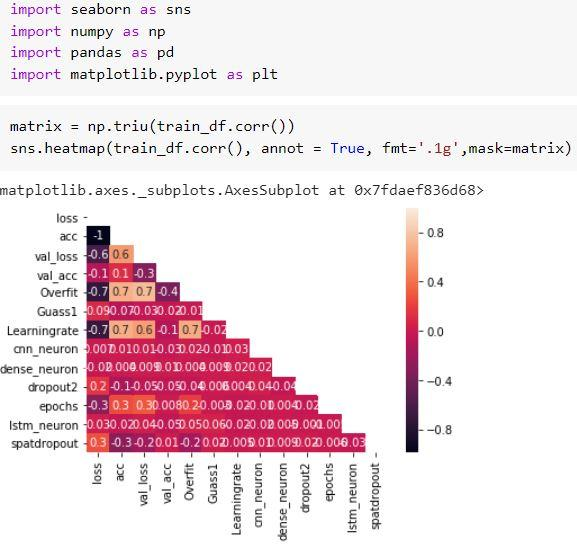